# Import the relevant libraries

In [1]:
# For the AI challenge we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
# loading the data
raw_data = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

# explore the head of the data
raw_data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


# Preprocessing

### description of  the variables

In [3]:
raw_data.describe(include='all')

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,2086,2086,2086.000000,2086,2002.000000,1995.000000,1840.000000,1910.000000,1848.000000
unique,3,3,NaN,277,NaN,NaN,NaN,NaN,NaN
top,Verkehrsunfälle,insgesamt,NaN,Summe,NaN,NaN,NaN,NaN,NaN
freq,894,894,NaN,154,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.963087,NaN,1434.433566,1409.676190,5.241538,1.669450,777.310065
std,NaN,NaN,6.615227,NaN,4634.494223,4564.043202,40.926314,30.197125,1164.856446
min,NaN,NaN,2000.000000,NaN,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,NaN,NaN,2005.000000,NaN,41.000000,41.000000,-15.540000,-12.500000,40.000000
50%,NaN,NaN,2011.000000,NaN,394.000000,394.000000,0.000000,-1.115000,421.000000
75%,NaN,NaN,2017.000000,NaN,863.250000,859.500000,18.712500,10.262500,814.250000


### Dealing with missing values

In [4]:
raw_data.isnull().sum()

MONATSZAHL                          0
AUSPRAEGUNG                         0
JAHR                                0
MONAT                               0
WERT                               84
VORJAHRESWERT                      91
VERAEND_VORMONAT_PROZENT          246
VERAEND_VORJAHRESMONAT_PROZENT    176
ZWOELF_MONATE_MITTELWERT          238
dtype: int64

In [5]:
#drop all missing values

data_no_miss = raw_data.dropna(axis=0)

In [6]:
data_no_miss.isnull().sum()

MONATSZAHL                        0
AUSPRAEGUNG                       0
JAHR                              0
MONAT                             0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
dtype: int64

In [7]:
#raw_data_sort1 = data_no_miss.sort_values(by=['WERT'] )
#raw_data_sort1.head()

In [8]:
# the head of data without the missing values
data_no_miss.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
17,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [9]:
# description  of data without the missing values
data_no_miss.describe(include='all')

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,1762,1762,1762.000000,1762,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
unique,3,3,NaN,252,NaN,NaN,NaN,NaN,NaN
top,Verkehrsunfälle,insgesamt,NaN,200509,NaN,NaN,NaN,NaN,NaN
freq,756,756,NaN,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.997162,NaN,774.797957,781.175369,5.277145,1.864381,777.199773
std,NaN,NaN,6.059847,NaN,1174.130753,1181.217350,41.519822,31.266033,1165.066224
min,NaN,NaN,2001.000000,NaN,0.000000,2.000000,-100.000000,-100.000000,12.000000
25%,NaN,NaN,2006.000000,NaN,37.000000,39.000000,-15.887500,-13.385000,40.000000
50%,NaN,NaN,2011.000000,NaN,355.500000,360.000000,0.000000,-1.140000,421.000000
75%,NaN,NaN,2016.000000,NaN,807.750000,813.750000,18.492500,11.445000,812.750000


In [10]:
#changing the type of the 'MONAT' column from object to integer
#data_no_miss['MONAT']  = data_no_miss['MONAT'].astype(object).astype(int)
#df = df.astype({"a": int, "b": complex})
data_no_miss = data_no_miss.astype({"MONAT" : int})
#data_no_miss['MONAT']  = data_no_miss['MONAT'].astype(object).astype(int)
data_no_miss['MONAT']

13      202101
14      202102
15      202103
16      202104
17      202105
         ...  
2068    200108
2069    200109
2070    200110
2071    200111
2072    200112
Name: MONAT, Length: 1762, dtype: int32

In [11]:
#Here I check the data again
data_no_miss.describe(include='all')

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,1762,1762,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
unique,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Verkehrsunfälle,insgesamt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,756,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.997162,201106.220772,774.797957,781.175369,5.277145,1.864381,777.199773
std,NaN,NaN,6.059847,605.996418,1174.130753,1181.217350,41.519822,31.266033,1165.066224
min,NaN,NaN,2001.000000,200101.000000,0.000000,2.000000,-100.000000,-100.000000,12.000000
25%,NaN,NaN,2006.000000,200603.250000,37.000000,39.000000,-15.887500,-13.385000,40.000000
50%,NaN,NaN,2011.000000,201106.000000,355.500000,360.000000,0.000000,-1.140000,421.000000
75%,NaN,NaN,2016.000000,201609.750000,807.750000,813.750000,18.492500,11.445000,812.750000


# Visualizations 

<AxesSubplot:xlabel='WERT', ylabel='Density'>

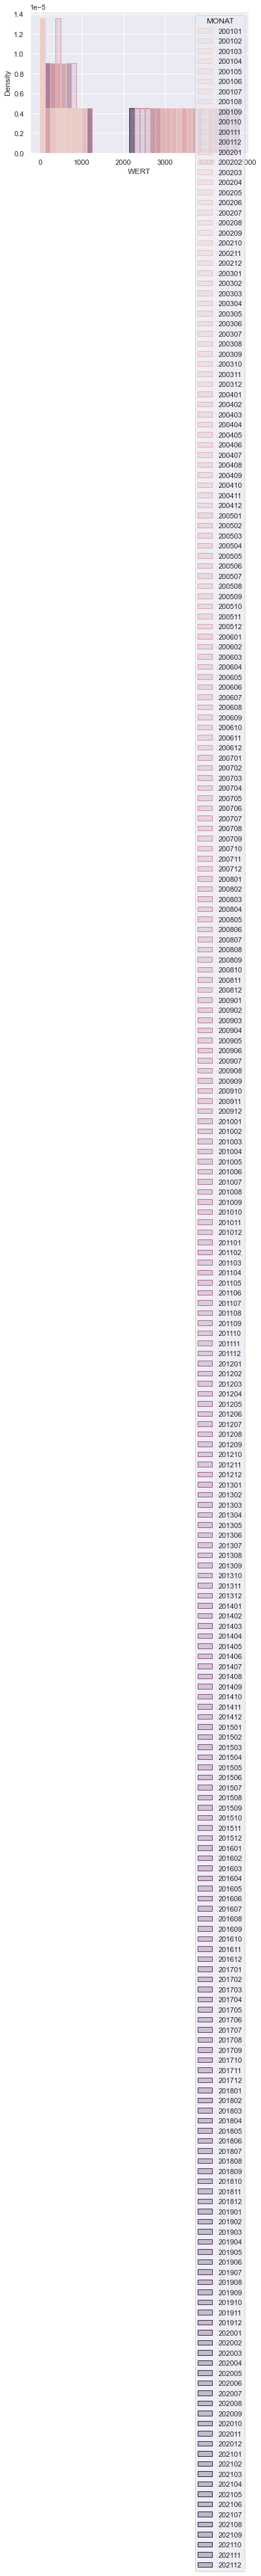

In [12]:
#Plot the graph of the WERT with respect to MONAT. Here Icheck some methods and finally find a histplot
#is a good one

#sns.histplot( data = data_no_miss , x="MONAT" , binwidth=0.5,binrange=0.7,discrete=1)
#sns.barplot(x="MONAT",y="WERT",data=data_no_miss )
#sns.boxplot(x ='WERT', y ='MONAT', data = data_no_miss, hue ='JAHR', saturation=2, width=1)
sns.histplot(
    data_no_miss, x="WERT", hue="MONAT", element="step",
    stat="density", common_norm=True
)



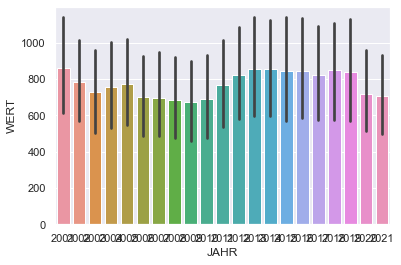

In [13]:
#Plot the graph of the WERT with respect to JAHR.
sns.barplot(x="JAHR",y="WERT",data=data_no_miss )
plt.show()



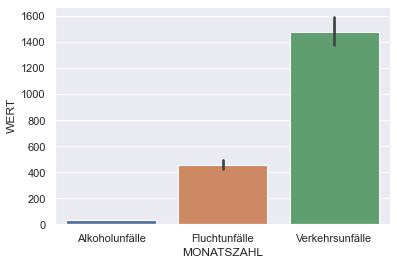

In [14]:
#Plot the graph of the WERT with respect to MONATSZAHL.
sns.barplot(x="MONATSZAHL",y="WERT",data=data_no_miss)
plt.show()

<AxesSubplot:xlabel='WERT', ylabel='Count'>

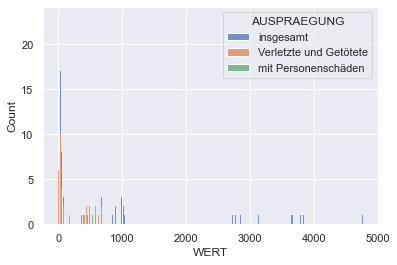

In [15]:
#Plot the graph of the WERT with respect to AUSPRAEGUNG.
sns.histplot(binwidth=0.5, x="WERT", hue="AUSPRAEGUNG", data=data_no_miss, stat="count", multiple="stack")


<AxesSubplot:xlabel='MONATSZAHL', ylabel='WERT'>

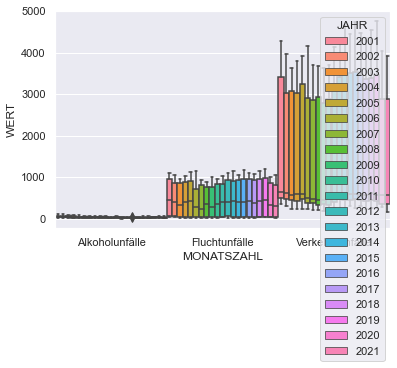

In [16]:
#Another graph for  the graph of the WERT with respect to MONATSZAHL.
#Plot the graph of the WERT with respect to MONATSZAHL.
sns.boxplot(x ='MONATSZAHL', y ='WERT', data = data_no_miss, hue ='JAHR', saturation=1, width=1)

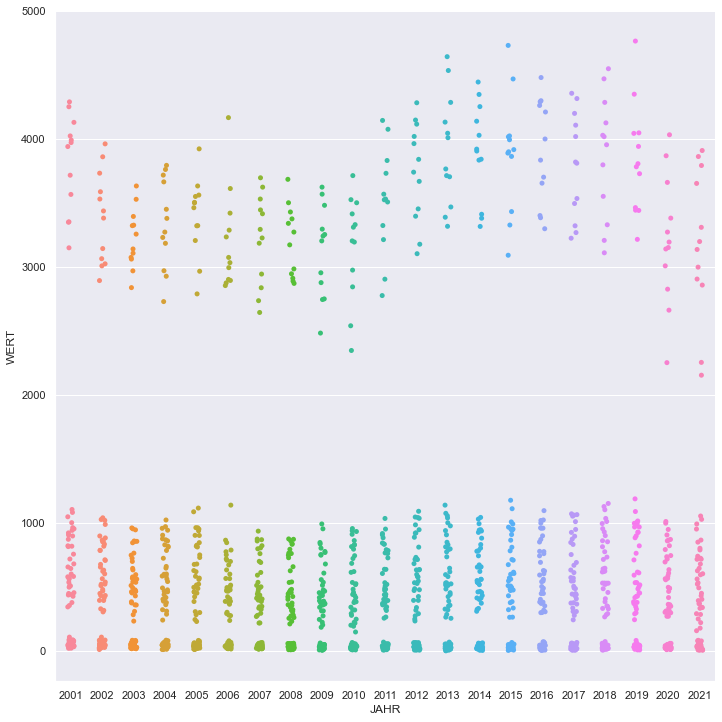

In [17]:
#Another plot for the graph of the WERT with respect to JAHR.
sns.catplot(data=data_no_miss, x="JAHR", y="WERT" , height=10,aspect=1)

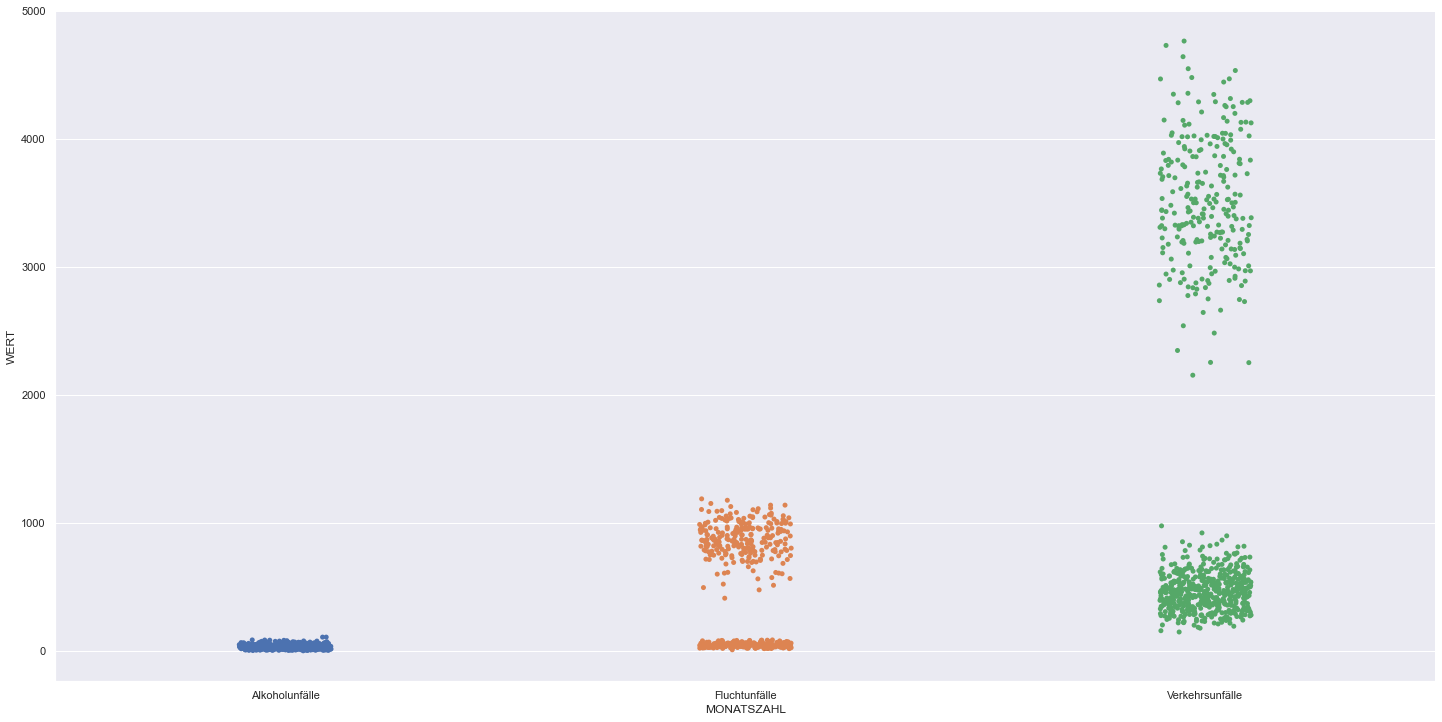

In [18]:
sns.catplot(data=data_no_miss, x="MONATSZAHL", y="WERT" ,  height=10,aspect=2)

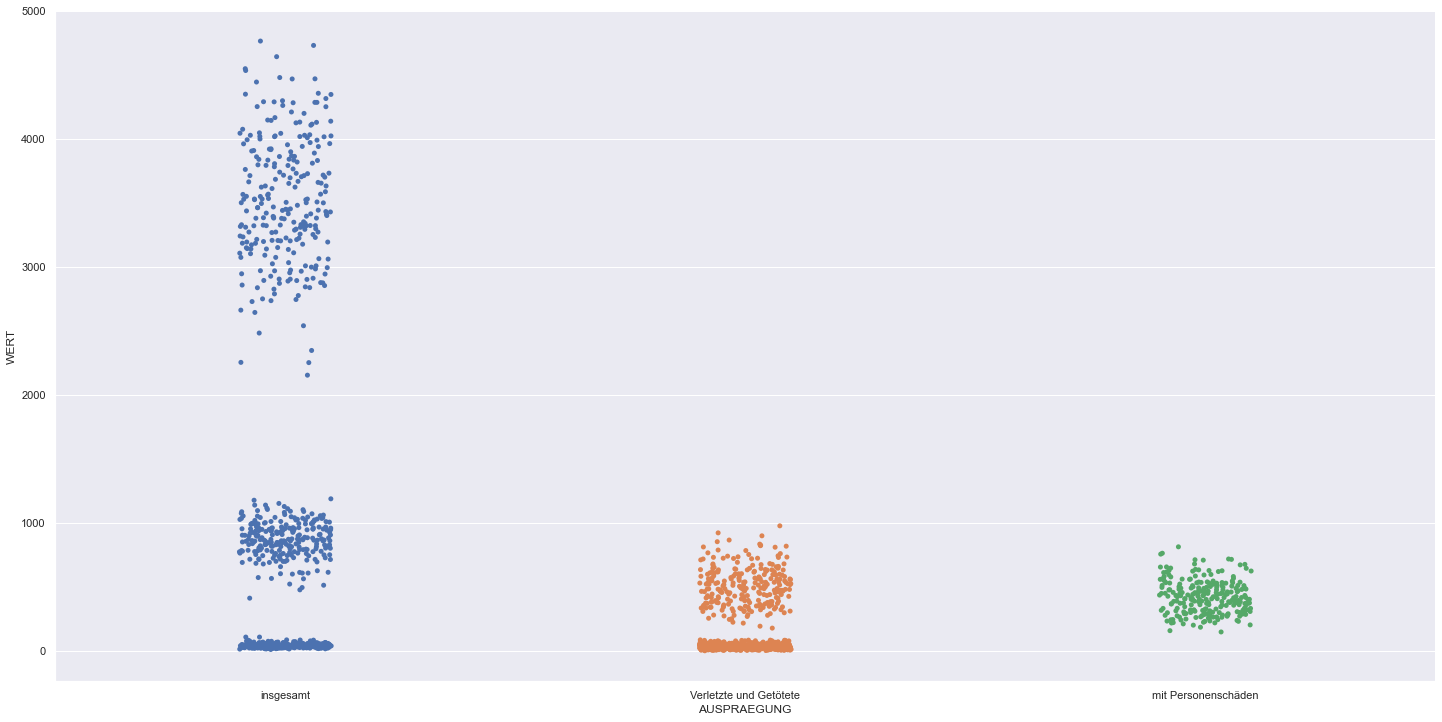

In [19]:
sns.catplot(data=data_no_miss, x="AUSPRAEGUNG", y="WERT" ,  height=10 , aspect=2)

# Exploring 

<AxesSubplot:xlabel='WERT', ylabel='Count'>

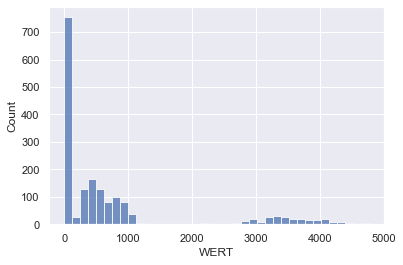

In [20]:
#Exploring  dependetn varialbe WERT. Give us information about the statistial model of our ML model
# And I can checkthe outliers of the variable WERT on the graph
sns.histplot(data_no_miss['WERT'])
# this looks like a normal distribution 

### Dealing with outliers

In [21]:
#here I used .quantile method and removed some outliers from WERT
#q1 = data_no_miss['WERT'].quantile(0.99)
q2 = data_no_miss['WERT'].quantile(0.01)
#data1 = data_no_miss[data_no_miss['WERT']<q1]
data1 = data_no_miss[data_no_miss['WERT']>q2]

<AxesSubplot:xlabel='WERT', ylabel='Count'>

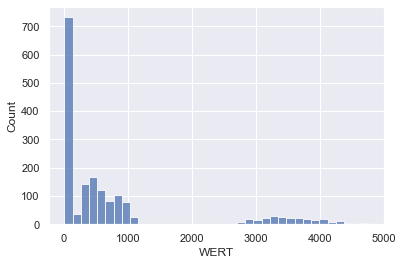

In [22]:
# Removing the outliers did not change the model
sns.histplot(data1['WERT'])

In [23]:
#since we droped some rows. here we need reset the index of the rows. To looking better our dataset
data_cleaned = data1.reset_index(drop=True)

In [24]:
data_cleaned.head(10)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
1,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
2,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
3,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
4,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0
5,Alkoholunfälle,insgesamt,2021,202106,48.0,49.0,100.00,-2.04,30.0
6,Alkoholunfälle,insgesamt,2021,202107,44.0,58.0,-8.33,-24.14,29.0
7,Alkoholunfälle,insgesamt,2021,202108,46.0,46.0,4.55,0.00,29.0
8,Alkoholunfälle,insgesamt,2021,202109,54.0,46.0,17.39,17.39,30.0
9,Alkoholunfälle,insgesamt,2021,202110,43.0,34.0,-20.37,26.47,30.0


In [25]:
data_cleaned.describe(include='all')

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
count,1740,1740,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000
unique,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Verkehrsunfälle,insgesamt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,756,756,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.949425,201101.469540,784.536207,790.926437,5.888534,2.345333,786.816092
std,NaN,NaN,6.070960,607.129811,1178.313926,1185.455995,41.150706,30.635571,1169.247974
min,NaN,NaN,2001.000000,200101.000000,7.000000,4.000000,-81.130000,-71.430000,12.000000
25%,NaN,NaN,2006.000000,200603.000000,39.000000,40.000000,-15.265000,-13.110000,41.000000
50%,NaN,NaN,2011.000000,201105.000000,364.500000,372.500000,0.000000,-1.045000,423.000000
75%,NaN,NaN,2016.000000,201609.250000,813.250000,817.750000,18.750000,11.525000,816.250000


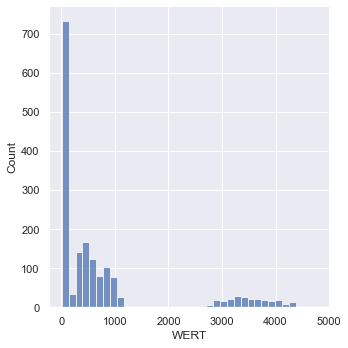

In [26]:
sns.displot(data_cleaned['WERT'])

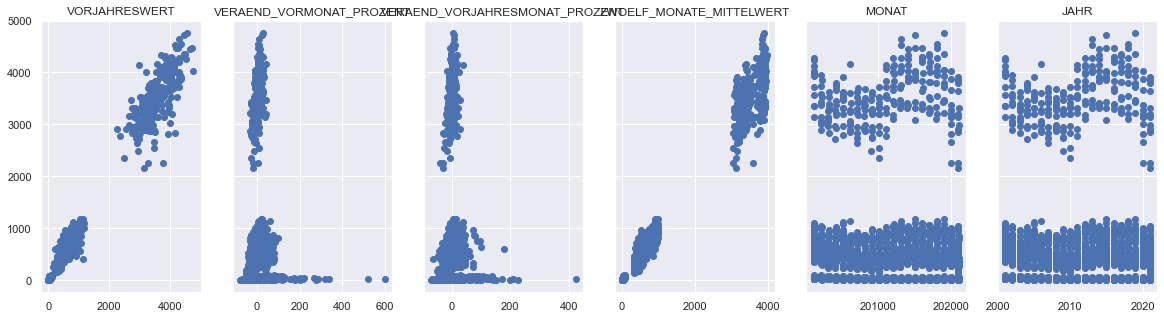

In [27]:
# Here I am going to use plt.scatter() and compare some features with WERT. This make a useful sense 
#to seclect independent features. since we can see the relations of the features and WERT 

# WERT is the 'y' axis of all the plots, and we plot them side-by-side (to easily compare them)

f, (ax1, ax2, ax3,ax4,ax5 , ax6) = plt.subplots(1, 6, sharey=True, figsize =(20,5)) 
ax1.scatter(data_cleaned['VORJAHRESWERT'],data_cleaned['WERT'])
ax1.set_title('VORJAHRESWERT')
ax2.scatter(data_cleaned['VERAEND_VORMONAT_PROZENT'],data_cleaned['WERT'])
ax2.set_title('VERAEND_VORMONAT_PROZENT')
ax3.scatter(data_cleaned['VERAEND_VORJAHRESMONAT_PROZENT'],data_cleaned['WERT'])
ax3.set_title('VERAEND_VORJAHRESMONAT_PROZENT')
ax4.scatter(data_cleaned['ZWOELF_MONATE_MITTELWERT'],data_cleaned['WERT'])
ax4.set_title('ZWOELF_MONATE_MITTELWERT')
ax5.scatter(data_cleaned['MONAT'],data_cleaned['WERT'])
ax5.set_title('MONAT')
ax6.scatter(data_cleaned['JAHR'],data_cleaned['WERT'])
ax6.set_title('JAHR')


plt.show()

In [28]:
#Try to find a good transformation for WERT 
# Let's transform 'WERT' with a log transformation
log_wert = np.log(data_cleaned['WERT'])
 
# and add it to the data frame
data_cleaned['log_wert'] = log_wert.round(3)
data_cleaned

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,log_wert
0,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0,2.773
1,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0,2.639
2,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0,3.178
3,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0,2.773
4,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0,3.178
...,...,...,...,...,...,...,...,...,...,...
1735,Verkehrsunfälle,Verletzte und Getötete,2001,200108,600.0,647.0,-34.85,-7.26,617.0,6.397
1736,Verkehrsunfälle,Verletzte und Getötete,2001,200109,643.0,675.0,7.17,-4.74,614.0,6.466
1737,Verkehrsunfälle,Verletzte und Getötete,2001,200110,717.0,615.0,11.51,16.59,623.0,6.575
1738,Verkehrsunfälle,Verletzte und Getötete,2001,200111,568.0,578.0,-20.78,-1.73,622.0,6.342


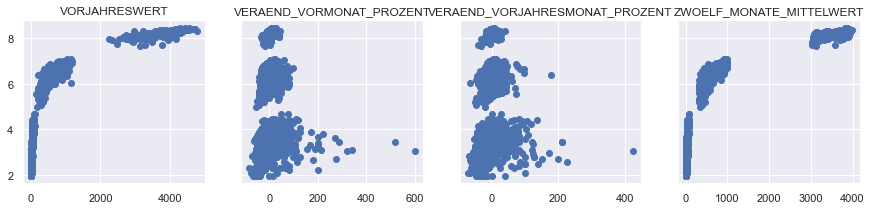

In [29]:
#Now I am  going to use scatterplot to compare the logWERT with other features
#perhaps, we can find some good relations between features and WERT

f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['VORJAHRESWERT'],data_cleaned['log_wert'])
ax1.set_title('VORJAHRESWERT')
ax2.scatter(data_cleaned['VERAEND_VORMONAT_PROZENT'],data_cleaned['log_wert'])
ax2.set_title('VERAEND_VORMONAT_PROZENT')
ax3.scatter(data_cleaned['VERAEND_VORJAHRESMONAT_PROZENT'],data_cleaned['log_wert'])
ax3.set_title('VERAEND_VORJAHRESMONAT_PROZENT')
ax4.scatter(data_cleaned['ZWOELF_MONATE_MITTELWERT'],data_cleaned['log_wert'])
ax4.set_title('ZWOELF_MONATE_MITTELWERT')


plt.show()

In [30]:
#since the log transformation gave me not a good result and relation between the feature, I omit it form the dataset
data_cleaned = data_cleaned.drop(['log_wert'],axis=1)

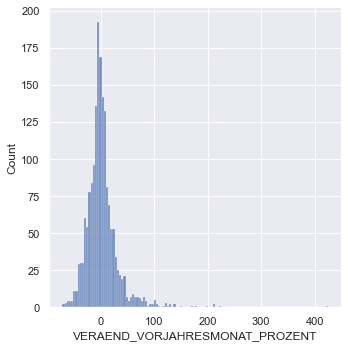

In [31]:
#Control the statistical model of ''VERAEND_VORJAHRESMONAT_PROZENT''
sns.displot(data_cleaned['VERAEND_VORJAHRESMONAT_PROZENT'])


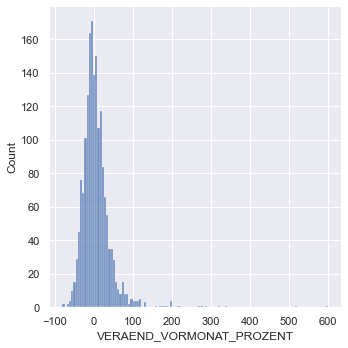

In [32]:
#Control the statistical model of ''VERAEND_VORMONAT_PROZENT''
sns.displot(data_cleaned['VERAEND_VORMONAT_PROZENT'])

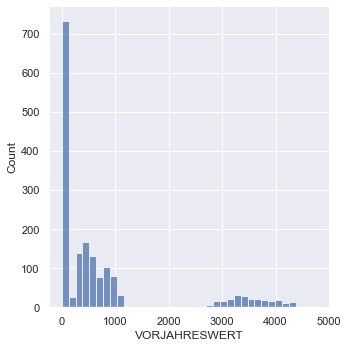

In [33]:
#Control the statistical model of ''VORJAHRESWERT''
sns.displot(data_cleaned['VORJAHRESWERT'])


### Multicollinearity

In [34]:
# Since I am going to use multilinear regression and I have several dependent variables, I have to chech the multicollinearity 
#of them. Thus I wouldlike to import variance_inflation_factor (VIF) from statsmodels.stats.outliers_influence  and 
#check the collinearity of the dependent variable. 

#if our variables have VIF begger than 5 and less than 10, they are good choices for our ML model. 

# http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Here, I will only take the numerical ones. the categorical is not necessary for this operation
variables = data_cleaned[['MONAT','JAHR', 'VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']]

# we create a new data frame with all VIF's
VIF = pd.DataFrame()

# by the variance_inflation_factor, we create VIF outputs  
VIF["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally,  explore the result
VIF["Features"] = variables.columns

In [35]:
VIF

,VIF,Features
0,3.797342e+09,MONAT
1,3.797346e+09,JAHR
2,7.632959e+01,VORJAHRESWERT
3,1.319053e+00,VERAEND_VORMONAT_PROZENT
4,1.269555e+00,VERAEND_VORJAHRESMONAT_PROZENT
5,7.670267e+01,ZWOELF_MONATE_MITTELWERT


In [36]:
#Since vif is begger than 5 and less than 10 for 'VERAEND_VORMONAT_PROZENT' and 'VERAEND_VORJAHRESMONAT_PROZENT',
#So we can use them in our model, there two features have no multicollinearity. And then omit two other features 
data_no_JAHR= data_cleaned.drop(['JAHR'],axis=1)
data_no_MONAT= data_no_JAHR.drop(['MONAT'],axis=1)
data_no_VVP= data_no_MONAT.drop(['VERAEND_VORMONAT_PROZENT'],axis=1)
data_no_VVPP= data_no_VVP.drop(['VERAEND_VORJAHRESMONAT_PROZENT'],axis=1)
data_no_multicollinearity =data_no_VVPP
data_no_multicollinearity.head()
#as a remark, I have already checked the other features, the result of my model with the above features is the optimal


,MONATSZAHL,AUSPRAEGUNG,WERT,VORJAHRESWERT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,16.0,28.0,35.0
1,Alkoholunfälle,insgesamt,14.0,40.0,33.0
2,Alkoholunfälle,insgesamt,24.0,27.0,32.0
3,Alkoholunfälle,insgesamt,16.0,26.0,32.0
4,Alkoholunfälle,insgesamt,24.0,40.0,30.0


### Create dummy variables

In [37]:
# in our data set, we have some categorical features. so we can use get_dummies' methods and find some numerical value for them  

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=False)
#We can use drop_first=False and keep  columns, but they will not affect to the final result 

In [38]:
#part 1 : this is the second method to get dummy features. but the above methods fave me a better result
#data1 = data_no_multicollinearity.copy()
#data1['MONATSZAHL'] = data1['MONATSZAHL'].map({'Alkoholunfälle':0 , 'Fluchtunfälle':1 , 'Verkehrsunfälle':2 })
#data1
data_with_dummies

,WERT,VORJAHRESWERT,ZWOELF_MONATE_MITTELWERT,MONATSZAHL_Alkoholunfälle,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_Verletzte und Getötete,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
0,16.0,28.0,35.0,1,0,0,0,1,0
1,14.0,40.0,33.0,1,0,0,0,1,0
2,24.0,27.0,32.0,1,0,0,0,1,0
3,16.0,26.0,32.0,1,0,0,0,1,0
4,24.0,40.0,30.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1735,600.0,647.0,617.0,0,0,1,1,0,0
1736,643.0,675.0,614.0,0,0,1,1,0,0
1737,717.0,615.0,623.0,0,0,1,1,0,0
1738,568.0,578.0,622.0,0,0,1,1,0,0


In [39]:
#part 2:
#data2 = data1.copy()
#data2['AUSPRAEGUNG'] = data2['AUSPRAEGUNG'].map({'insgesamt':0 , 'Verletzte und Getötete':1 , 'mit Personenschäden':2 })
#data2

In [40]:
#part 3:
# Here's the result
#data_with_dummies= data2

In [41]:
# We  display all possible features and then choose them
data_with_dummies.columns.values

array(['WERT', 'VORJAHRESWERT', 'ZWOELF_MONATE_MITTELWERT',
       'MONATSZAHL_Alkoholunfälle', 'MONATSZAHL_Fluchtunfälle',
       'MONATSZAHL_Verkehrsunfälle', 'AUSPRAEGUNG_Verletzte und Getötete',
       'AUSPRAEGUNG_insgesamt', 'AUSPRAEGUNG_mit Personenschäden'],
      dtype=object)

In [42]:
#  a new variable that will contain the preferred order
# I toke the depend variable in the beginning  and dummies at the end. 

cols =['WERT', 'VORJAHRESWERT', 'ZWOELF_MONATE_MITTELWERT',
       'MONATSZAHL_Alkoholunfälle', 'MONATSZAHL_Fluchtunfälle',
       'MONATSZAHL_Verkehrsunfälle', 'AUSPRAEGUNG_Verletzte und Getötete',
       'AUSPRAEGUNG_insgesamt', 'AUSPRAEGUNG_mit Personenschäden']



In [43]:
# create a new df to implement the reordering with new order
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,WERT,VORJAHRESWERT,ZWOELF_MONATE_MITTELWERT,MONATSZAHL_Alkoholunfälle,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_Verletzte und Getötete,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
0,16.0,28.0,35.0,1,0,0,0,1,0
1,14.0,40.0,33.0,1,0,0,0,1,0
2,24.0,27.0,32.0,1,0,0,0,1,0
3,16.0,26.0,32.0,1,0,0,0,1,0
4,24.0,40.0,30.0,1,0,0,0,1,0


In [44]:
data_preprocessed.describe(include='all')

,WERT,VORJAHRESWERT,ZWOELF_MONATE_MITTELWERT,MONATSZAHL_Alkoholunfälle,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_Verletzte und Getötete,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
count,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000,1740.000000
mean,784.536207,790.926437,786.816092,0.275862,0.289655,0.434483,0.420690,0.434483,0.144828
std,1178.313926,1185.455995,1169.247974,0.447076,0.453733,0.495831,0.493812,0.495831,0.352028
min,7.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,40.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,364.500000,372.500000,423.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,813.250000,817.750000,816.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,4763.000000,4763.000000,3977.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear regression model

### Linear regression model

In [45]:
# The target(s) (dependent variable) is 'WERT'
targets = data_preprocessed['WERT']

# The inputs are everything WITHOUT the dependent variable, so we should drop it from the dataset
inputs = data_preprocessed.drop(['WERT'],axis=1)

### Train Test Split

In [46]:
# we import the module for the split and split the data to train and test parts
from sklearn.model_selection import train_test_split

# we split the variables with an 80-20 split and some random state

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=20)


### Create the regression 

In [47]:
# Create a linear regression object 
#note that, my model is multilinear regression 
reg = LinearRegression()
# Fit the regressionwith x_train and y_train 
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
# check the outputs of the regression
y_hat = reg.predict(x_train)

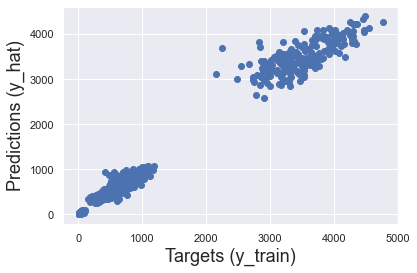

In [49]:
# to compare the targets (y_train) and the predictions (y_hat), we use a scatter plot and plot the y_train ands y_hat
# if our graph is  close to the 45-degree line, we will  have a better prediction
plt.scatter(y_train, y_hat)
#name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

# We want the x-axis and the y-axis to be the same
plt.xlim()
plt.ylim()
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

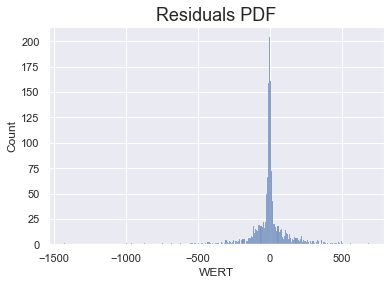

In [50]:
# Using a residual plot is useful to check our model
# We plot the PDF of the residuals and check for anomalies
sns.histplot(y_train - y_hat)

# the title
plt.title("Residuals PDF", size=18)

# the best scenario is the plot be normally distributed
# The definition of the residuals is (y_train - y_hat), negative values imply
# that predictions are much higher than the targets


In [51]:
# The R-squared of the model is
reg.score(x_train,y_train)

# This is the accuracy of the model

0.986868540782348

### Finding the weights and bias

In [52]:
# The bias (intercept) of the regression
reg.intercept_

-1.333949458750908

In [53]:
# The weights (coefficients) of the regression
reg.coef_


array([ 0.60992532,  0.38405026, -0.13950215,  2.11349338, -1.97399123,
        0.07174766,  0.77667455, -0.84842221])

In [54]:
# A regression summary is helpful to compare the features with the weigths
#variables = data_cleaned[['MONAT','JAHR', 'VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']]
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,VORJAHRESWERT,0.609925
1,ZWOELF_MONATE_MITTELWERT,0.384050
2,MONATSZAHL_Alkoholunfälle,-0.139502
3,MONATSZAHL_Fluchtunfälle,2.113493
4,MONATSZAHL_Verkehrsunfälle,-1.973991
5,AUSPRAEGUNG_Verletzte und Getötete,0.071748
6,AUSPRAEGUNG_insgesamt,0.776675
7,AUSPRAEGUNG_mit Personenschäden,-0.848422


### Testing

In [55]:
# We have trained our model, now we need to test it as follow.
# We have prepared a dataset to test our model and it is called 'x_test', and the outputs is 'y_test' 

y_hat_test = reg.predict(x_test)

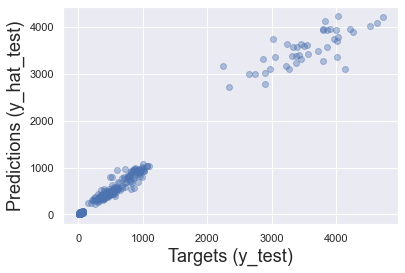

In [56]:
# We create another scatter plot with the test targets and the test predictions. This plot should be similar to 
#the scatter plot with the train set
# the argument 'alpha' is the opacity of the graph
plt.scatter(y_test, y_hat_test, alpha=0.4)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim()
plt.ylim()
plt.show()

In [57]:
# Here we check these predictions manually 
data_with_pred = pd.DataFrame(y_hat_test, columns=['Prediction'])
data_with_pred.head()

,Prediction
0,426.821586
1,307.367325
2,3582.779812
3,3929.159092
4,399.240800


In [58]:
# And then include the test targets in the data frame and then compre them manually 
data_with_pred['Target'] = y_test
data_with_pred

# Note that we have a lot of missing values

,Prediction,Target
0,426.821586,NaN
1,307.367325,NaN
2,3582.779812,NaN
3,3929.159092,NaN
4,399.240800,NaN
...,...,...
343,41.243016,NaN
344,444.103848,NaN
345,511.376584,35.0
346,19.245908,NaN


In [59]:
# Now we can use the result of y_test an  find the issue 
# to get a proper result, we neet to reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     441.0
1     229.0
2    3503.0
3    3805.0
4     407.0
Name: WERT, dtype: float64

In [60]:
# we overwrite the 'Target' column 

data_with_pred['Target'] = y_test
data_with_pred

,Prediction,Target
0,426.821586,441.0
1,307.367325,229.0
2,3582.779812,3503.0
3,3929.159092,3805.0
4,399.240800,407.0
...,...,...
343,41.243016,44.0
344,444.103848,451.0
345,511.376584,592.0
346,19.245908,24.0


In [61]:
# We calculate the difference between the targets and the predictions. This is actually the residual.
#This is useful to compare our results(target and prediction)
data_with_pred['Residual'] = data_with_pred['Target'] - data_with_pred['Prediction']


In [62]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# we take the absolute difference in %, so we can easily order the data frame
data_with_pred['Difference%'] = np.absolute(data_with_pred['Residual']/data_with_pred['Target']*100)
data_with_pred
#This makes sense to see how far off from the results precentage wise

,Prediction,Target,Residual,Difference%
0,426.821586,441.0,14.178414,3.215060
1,307.367325,229.0,-78.367325,34.221539
2,3582.779812,3503.0,-79.779812,2.277471
3,3929.159092,3805.0,-124.159092,3.263051
4,399.240800,407.0,7.759200,1.906437
...,...,...,...,...
343,41.243016,44.0,2.756984,6.265874
344,444.103848,451.0,6.896152,1.529080
345,511.376584,592.0,80.623416,13.618820
346,19.245908,24.0,4.754092,19.808716


In [63]:
data_with_pred.describe()

,Prediction,Target,Residual,Difference%
count,348.000000,348.000000,348.000000,348.000000
mean,726.882485,733.514368,6.631883,16.691419
std,1116.669285,1134.358886,142.156302,17.433957
min,7.408677,7.000000,-905.511042,0.000189
25%,39.384927,39.750000,-14.601895,5.258232
50%,370.968495,373.500000,1.802321,11.402031
75%,787.745037,783.000000,30.305121,22.786786
max,4213.306569,4729.000000,1038.900194,160.051638


In [64]:
# Again we check our outputs manually
# To see all rows, we can use the following  pandas syntax, and show the result with 2 digit after dot
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Now, we sort by difference in % 
data_with_pred.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
104,3383.01,3383.00,-0.01,0.00
231,75.88,76.00,0.12,0.15
138,48.17,48.00,-0.17,0.35
341,943.55,948.00,4.45,0.47
37,945.83,941.00,-4.83,0.51
76,463.21,466.00,2.79,0.60
212,26.20,26.00,-0.20,0.76
213,3388.75,3419.00,30.25,0.88
215,54.50,55.00,0.50,0.90
314,937.50,929.00,-8.50,0.91


In [65]:
# we create the OLS summary table for our multilinear regression model to see the details of the model
x = sm.add_constant(inputs)
results = sm.OLS(targets,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WERT   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.095e+04
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:29:25   Log-Likelihood:                -11034.
No. Observations:                1740   AIC:                         2.208e+04
Df Residuals:                    1733   BIC:                         2.212e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.6299      2.654     -0.237      0.812      -5.835       4.576
VORJAHRESWERT                          0.6039      0.019     31.790      0.000       0.567       0.641
ZWOELF_MONATE_MITTELWERT               0.3933      0.020     19.902      0.000       0.355       0.432
MONATSZAHL_Alkoholunfälle              1.8631      6.813      0.273      0.785     -11.499      15.225
MONATSZAHL_Fluchtunfälle               1.2783      5.514      0.232      0.817      -9.536      12.093
MONATSZAHL_Verkehrsunfälle            -3.7714      8.382     -0.450      0.653     -20.212      12.669
AUSPRAEGUNG_Verletzte und Getötete    -0.1187      4.778     -0.025      0.980      -9.490       9.252
AUSPRAEGUNG_insgesamt                 -3.5880      8.363     -0.429      0.668     -19.991      12.815
AUSPRAEGUNG_mit Personenschäden        3.0768      9.395      0.327      0.743     -15.350      21.504
==============================================================================
Omnibus:                      654.096   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21900.546
Skew:                          -1.103   Prob(JB):                         0.00
Kurtosis:                      20.240   Cond. No.                     2.64e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
# The above table is useful, but for p-values of the multilinear regression does not work. So it is better we apply
# another methods to check the p-values
#Since we applied a multilinear regression, it is better to use f_regression to check the p-values of our features .
from sklearn.feature_selection import f_regression
f_regression(inputs , targets)

(array([1.01454991e+05, 7.89830550e+04, 3.19843934e+02, 5.59323449e+01,
        6.34209100e+02, 3.84604313e+02, 6.24248432e+02, 2.84660754e+01]),
 array([0.00000000e+000, 0.00000000e+000, 8.56228937e-066, 1.18378481e-013,
        1.45530747e-119, 1.60588215e-077, 5.66861232e-118, 1.07868896e-007]))

In [67]:
p_values = f_regression(inputs , targets)[1].round(3)
p_values

array([0., 0., 0., 0., 0., 0., 0., 0.])

# Some numerical examples for our prediction model

In [68]:
# My indepenten variables are 'VORJAHRESWERT', 'ZWOELF_MONATE_MITTELWERT',
# 'MONATSZAHL_Alkoholunfälle', 'MONATSZAHL_Fluchtunfälle',
# 'MONATSZAHL_Verkehrsunfälle', 'AUSPRAEGUNG_Verletzte und Getötete',
# 'AUSPRAEGUNG_insgesamt', 'AUSPRAEGUNG_mit Personenschäden'

#Since we have multiple values for Category: 'Alkoholunfälle', Type: 'insgesamt and year '2021' 
#and month '202101', we need to have the precise value of 
#'VORJAHRESWERT' 202101 = 28 , 719,3139
#'ZWOELF_MONATE_MITTELWERT' 202101 = 35 , 813 ,3121

#check 1
#data_check1 = [28, 35 , 1, 0,0 ,0,1,0]
#data_check1_arr = np.array(data_check1)
#data_check1_num = data_check1_arr.reshape(1,-1)
#pred_check1 = reg.predict(data_check1_num)
#pred_check1

In [69]:
#check 2 -34.13
#data_check2 = [719, 813 ,1,  0,0,0 ,1,0]
#data_check2_arr = np.array(data_check2)
#data_check2_num = data_check2_arr.reshape(1,-1)
#pred_check2 = reg.predict(data_check2_num)
#pred_check2

In [70]:
#check 3 -31.41
#data_check3 = [3139, 3121, 1,  0,0 ,0,1,0]
#data_check3_arr = np.array(data_check3)
#data_check3_num = data_check3_arr.reshape(1,-1)
#pred_check3 = reg.predict(data_check3_num)
#pred_check3

# Deploy the Model via Flask

### Make a Pickle file of our model

In [71]:
import pickle

In [72]:
#Using dump method, and pass our object
pickle.dump(reg , open('pred_model.pkl' , 'wb'))
